In [7]:
%matplotlib inline

from TDSLib import TDS


# All parameters for calculating sensitivity factor.

In [8]:
is_sensitivity_file = True
background_sensitivity_file = 'feb01_18.a01'
tds_sensitivity_file = 'feb01_18.a01'
dwell_time = 0.2

background_plateau_index = [396, 451, 488, 540, 583, 661, 702, 802]
background_plateau_pressure = [13.8,10.5,7.9,4.7]

tds_plateau_index = [210, 240, 300, 380, 420, 480]
tds_plateau_pressure = [29, 19, 9.0]

In [9]:
background_sensitivity = TDS(background_sensitivity_file)
tds_sensitivity = TDS(tds_sensitivity_file)

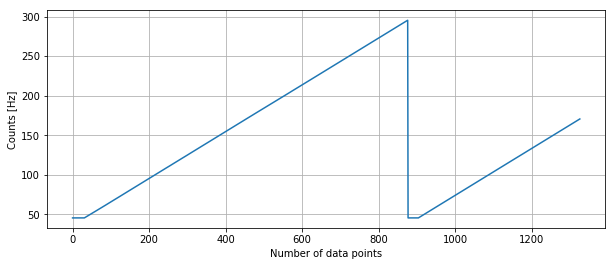

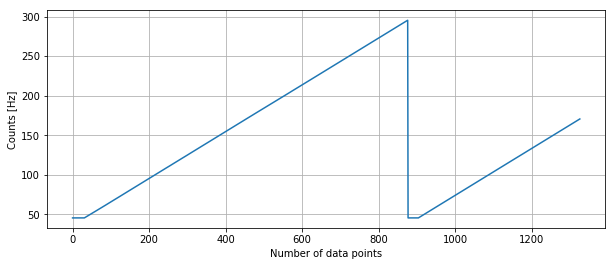

In [10]:
background_sensitivity.load_data(dwell_time=dwell_time, is_sensitivity_file=is_sensitivity_file)
tds_sensitivity.load_data(dwell_time=dwell_time, is_sensitivity_file=is_sensitivity_file)

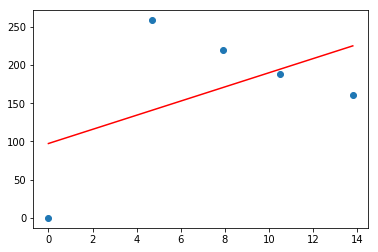

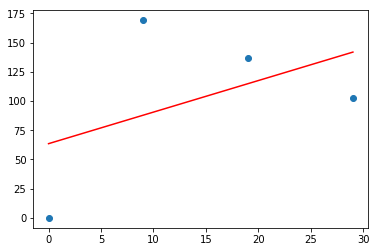

Stored 'sensitivity' (float64)


In [11]:
background_sensitivity = background_sensitivity.calculate_sensitivity_factor(
    background_plateau_index,
    background_plateau_pressure,
    show_plot=True
)

tds_sensitivity = tds_sensitivity.calculate_sensitivity_factor(
    tds_plateau_index,
    tds_plateau_pressure,
    show_plot=True
)
sensitivity = tds_sensitivity / background_sensitivity
%store sensitivity

In [12]:
is_sensitivity_file = False
background_tds_file = 'mar22_18.d01'
tds_before_cird_file = 'may17_18.d01'
tds_after_cird_file = 'may17_18.d02'
dwell_time = 0.2

method = 1
start_temp = 100
total_npts = 760
linear_bg_start_npts = 10
linear_bg_end_npts = 0

low_temp = 110
split_temp = 210
high_temp = 450


In [13]:
background = TDS(background_tds_file)
tds_before_cird = TDS(tds_before_cird_file)
tds_after_cird = TDS(tds_after_cird_file)

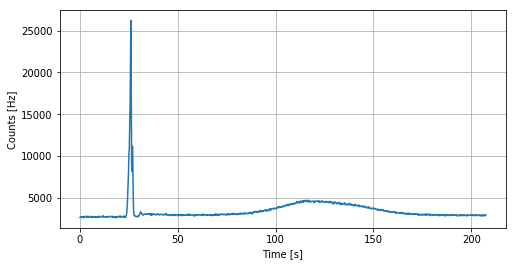

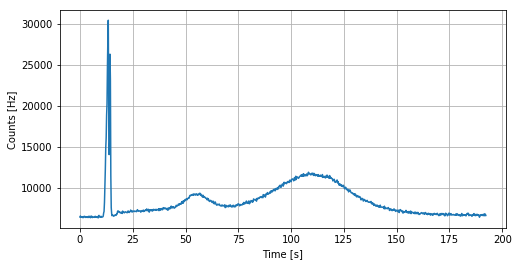

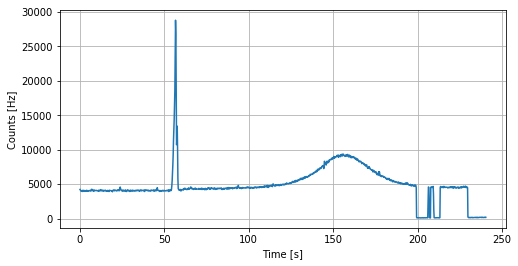

In [14]:
background.load_data(dwell_time=dwell_time, is_sensitivity_file=is_sensitivity_file)
tds_before_cird.load_data(dwell_time=dwell_time, is_sensitivity_file=is_sensitivity_file)
tds_after_cird.load_data(dwell_time=dwell_time, is_sensitivity_file=is_sensitivity_file)

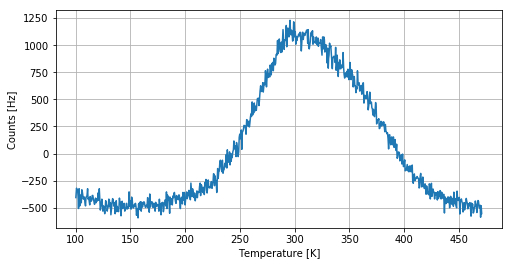

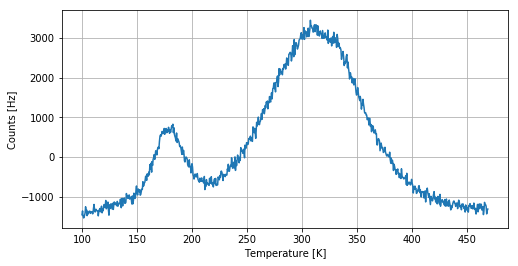

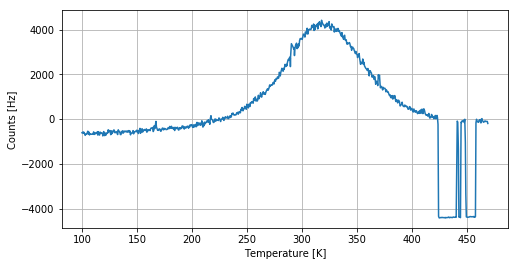

In [29]:
background.level_background(method=method, start_temp=start_temp, total_npts=total_npts,
                           linear_bg_start_npts=linear_bg_start_npts, linear_bg_end_npts=linear_bg_end_npts,
                           sensitivity=sensitivity, show_plot=True)
tds_before_cird.level_background(method=method, start_temp=start_temp, total_npts=total_npts,
                           linear_bg_start_npts=linear_bg_start_npts, linear_bg_end_npts=linear_bg_end_npts,
                           sensitivity=sensitivity, show_plot=True)
tds_after_cird.level_background(method=method, start_temp=start_temp, total_npts=total_npts,
                           linear_bg_start_npts=linear_bg_start_npts, linear_bg_end_npts=linear_bg_end_npts,
                           sensitivity=sensitivity, show_plot=True)

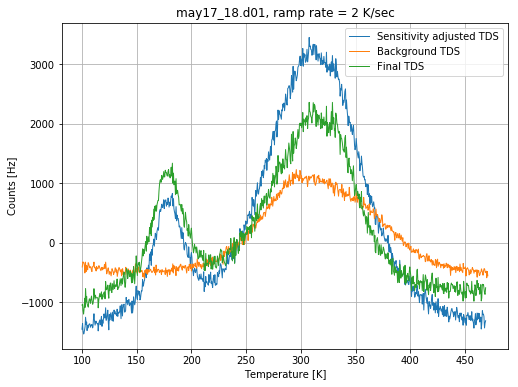

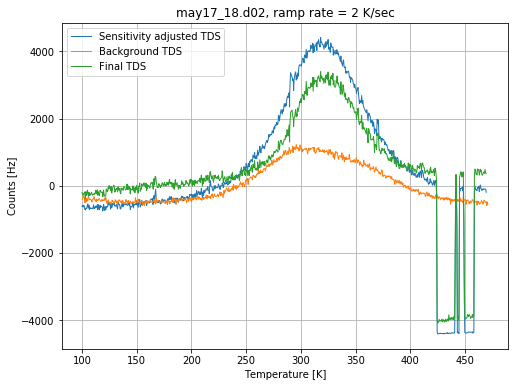

In [30]:
tds_before_cird.background_subtraction(background, show_plot=True)
tds_after_cird.background_subtraction(background, show_plot=True)

In [11]:
tds_before_cird.integrate_area(low_temp=low_temp, split_temp=split_temp, high_temp=high_temp)
tds_after_cird.integrate_area(low_temp=low_temp, split_temp=split_temp, high_temp=high_temp)